___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

In [1]:
# for google colab : 
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import sys
# import os

# py_file_location = "/content/drive/My Drive"
# sys.path.append(os.path.abspath(py_file_location))

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (streamlit api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import colorama
from colorama import Fore, Style
from termcolor import colored
from EDA import first_looking, duplicate_values, missing_values # we created this local module.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectPercentile, f_classif, f_regression, mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from MLscores import matris_scorer, model_scorer # we created this local module.

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_palette("Set2")


In [4]:
#df = pd.read_csv("/content/drive/MyDrive/Data/creditcard.csv")
df = pd.read_csv("creditcard.part1/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [5]:
first_looking(df)  # shows missing values, number of duplicate values, number of unique values and changes the column names to lowercase for easy use.

Shape:(284807, 31)
There is 284807 observation and 31 columns in the dataset.
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 1

In [ ]:
# there is no missing values. 

In [6]:
df[df.duplicated()]["class"].value_counts()

0    1062
1      19
Name: class, dtype: int64

In [7]:
# duplicate_values(df[df["class"]==0]) # the dataset is already imbalanced. So, at first, we decided to drop only "0"s. but we don't want to alter the dataset.
# Although this may give us better results, it would not reflect the facts.

duplicate_values(df) # this function drops the duplicates and shows how much duplicates were dropped.

1081 duplicates were dropped
-------------------------------------------------------------------------------


### Exploratory Data Analysis

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,283726.000,94811.078,47481.048,0.000,54204.750,84692.500,139298.000,172792.000
v1,283726.000,0.006,1.948,-56.408,-0.916,0.020,1.316,2.455
v2,283726.000,-0.004,1.647,-72.716,-0.600,0.064,0.800,22.058
v3,283726.000,0.002,1.509,-48.326,-0.890,0.180,1.027,9.383
v4,283726.000,-0.003,1.414,-5.683,-0.850,-0.022,0.740,16.875
v5,283726.000,0.002,1.377,-113.743,-0.690,-0.053,0.612,34.802
v6,283726.000,-0.001,1.332,-26.161,-0.769,-0.275,0.397,73.302
v7,283726.000,0.002,1.228,-43.557,-0.553,0.041,0.570,120.589
v8,283726.000,-0.001,1.179,-73.217,-0.209,0.022,0.326,20.007
v9,283726.000,-0.002,1.095,-13.434,-0.644,-0.053,0.596,15.595


In [ ]:
# v1-v28 represents normal distribution (~0 mean, ~0 median and ~1 std)
# Time is between 0 and 172792 >> within 1 day 23 hours 59 minutes 52 seconds

### Data Cleaning
Check Missing Values and Outliers

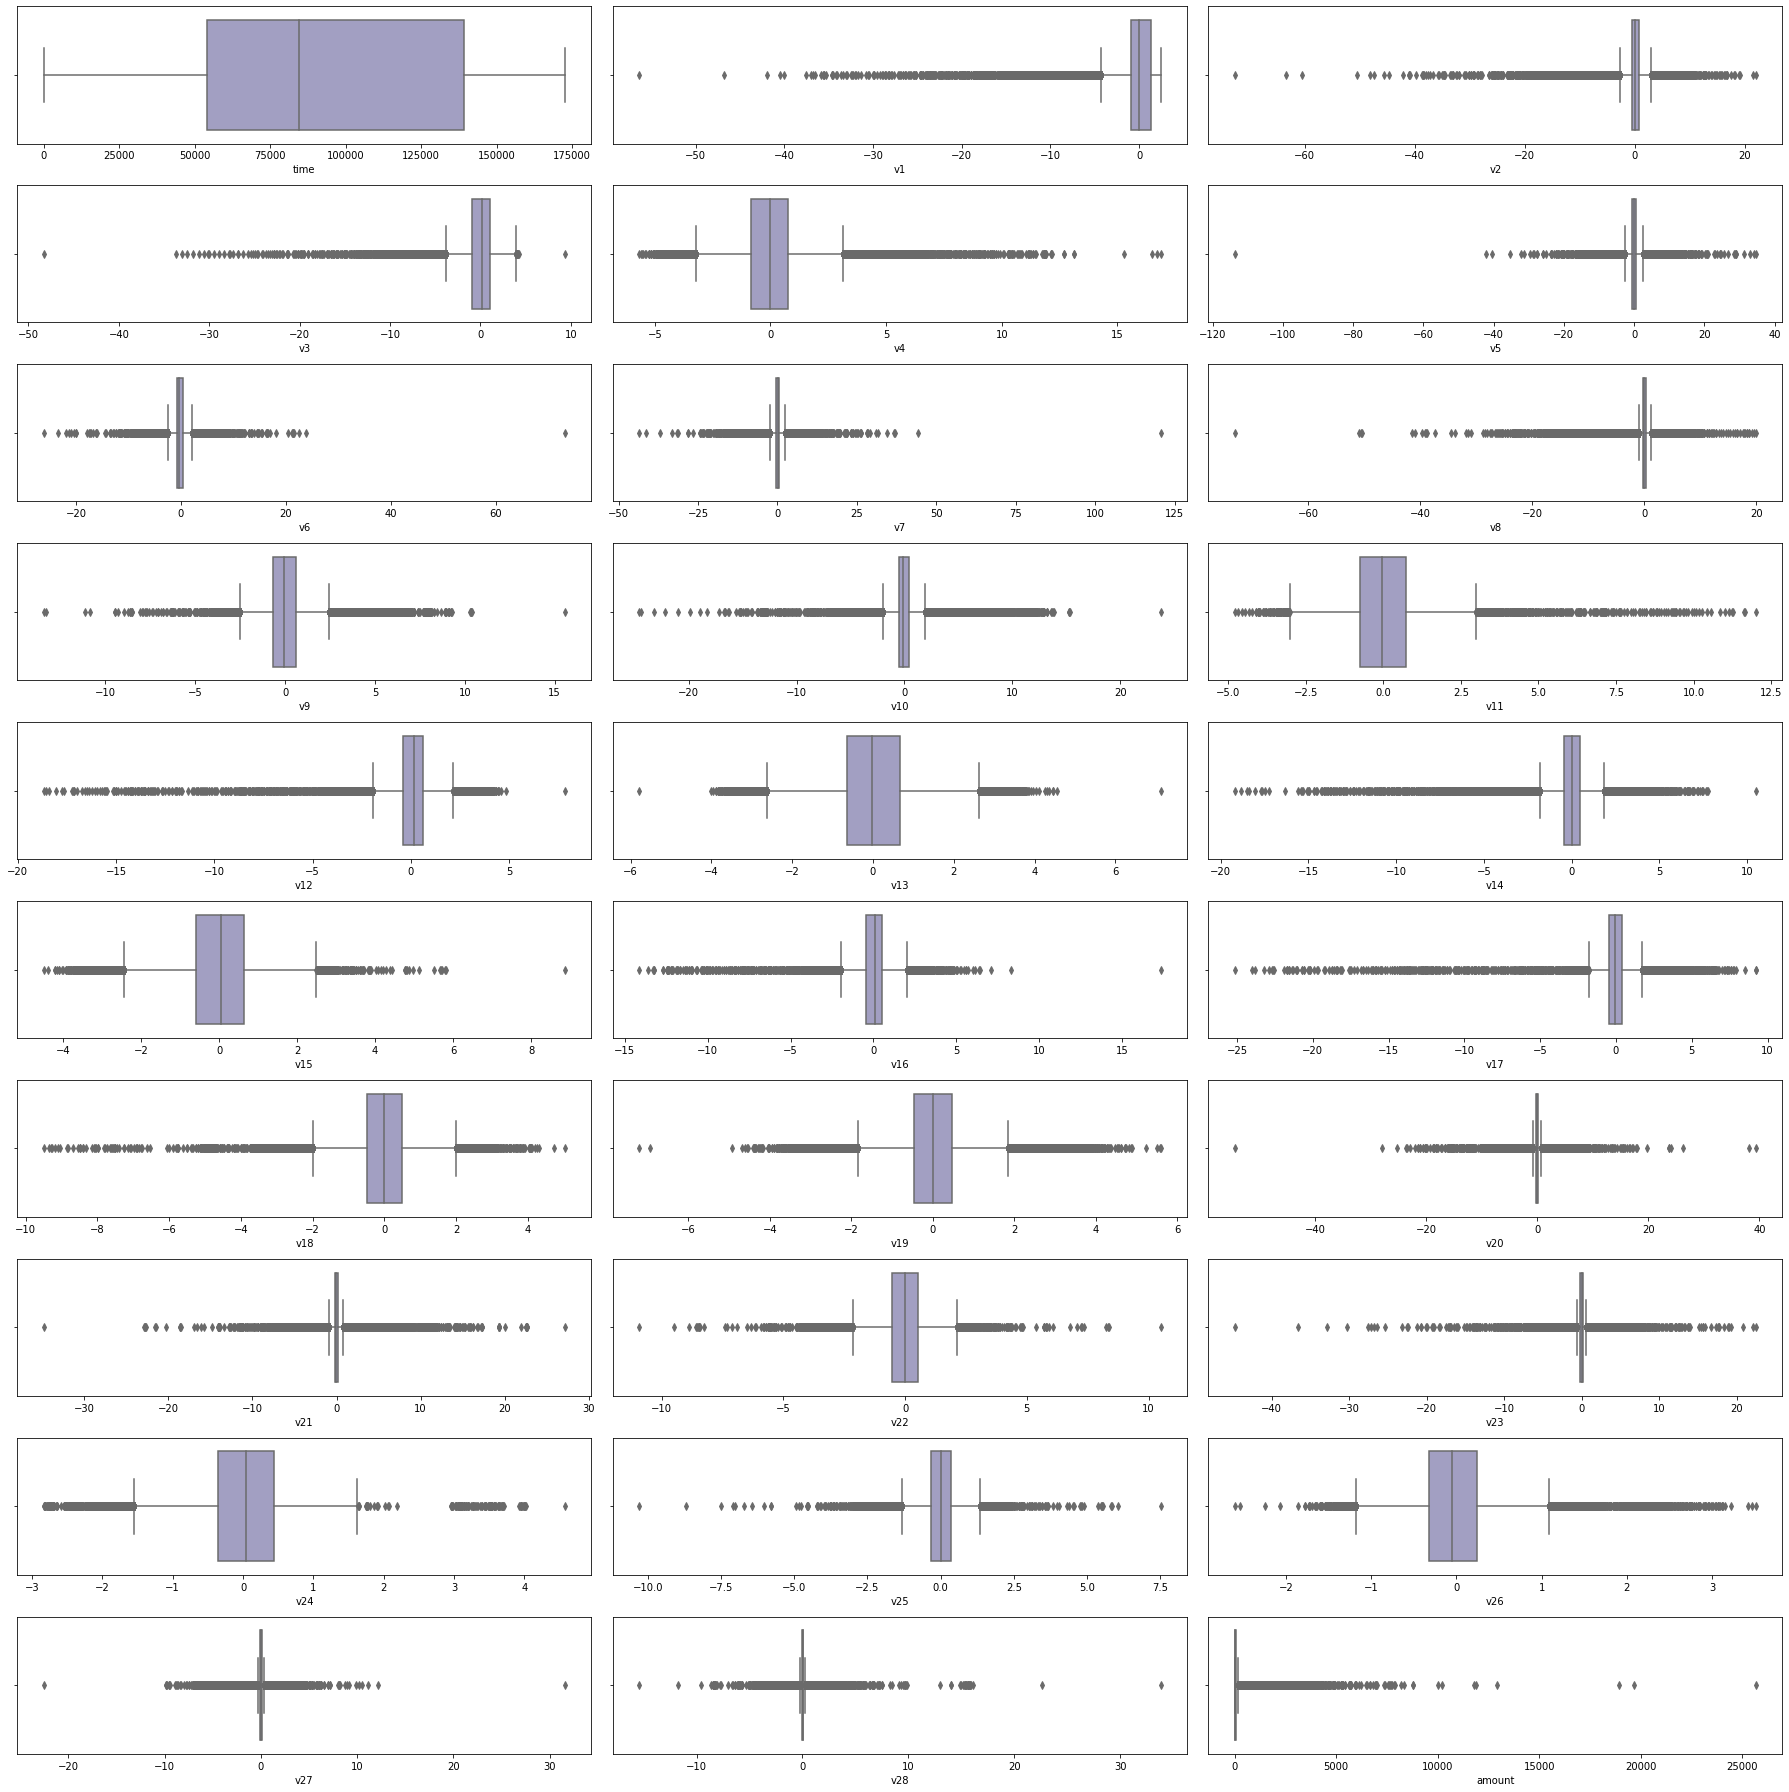

In [9]:
index = 0
plt.figure(figsize=(25,25))
for feature in df:
    if feature != "class":
        index += 1
        plt.subplot(10, 3, index)
        sns.boxplot(x=feature ,palette="Purples", data=df)
plt.tight_layout()

In [ ]:
# there seems to be outliers but should we drop them? they have outliers but v1-28 represent normal distribution. so we don't consider them as outliers and continue.

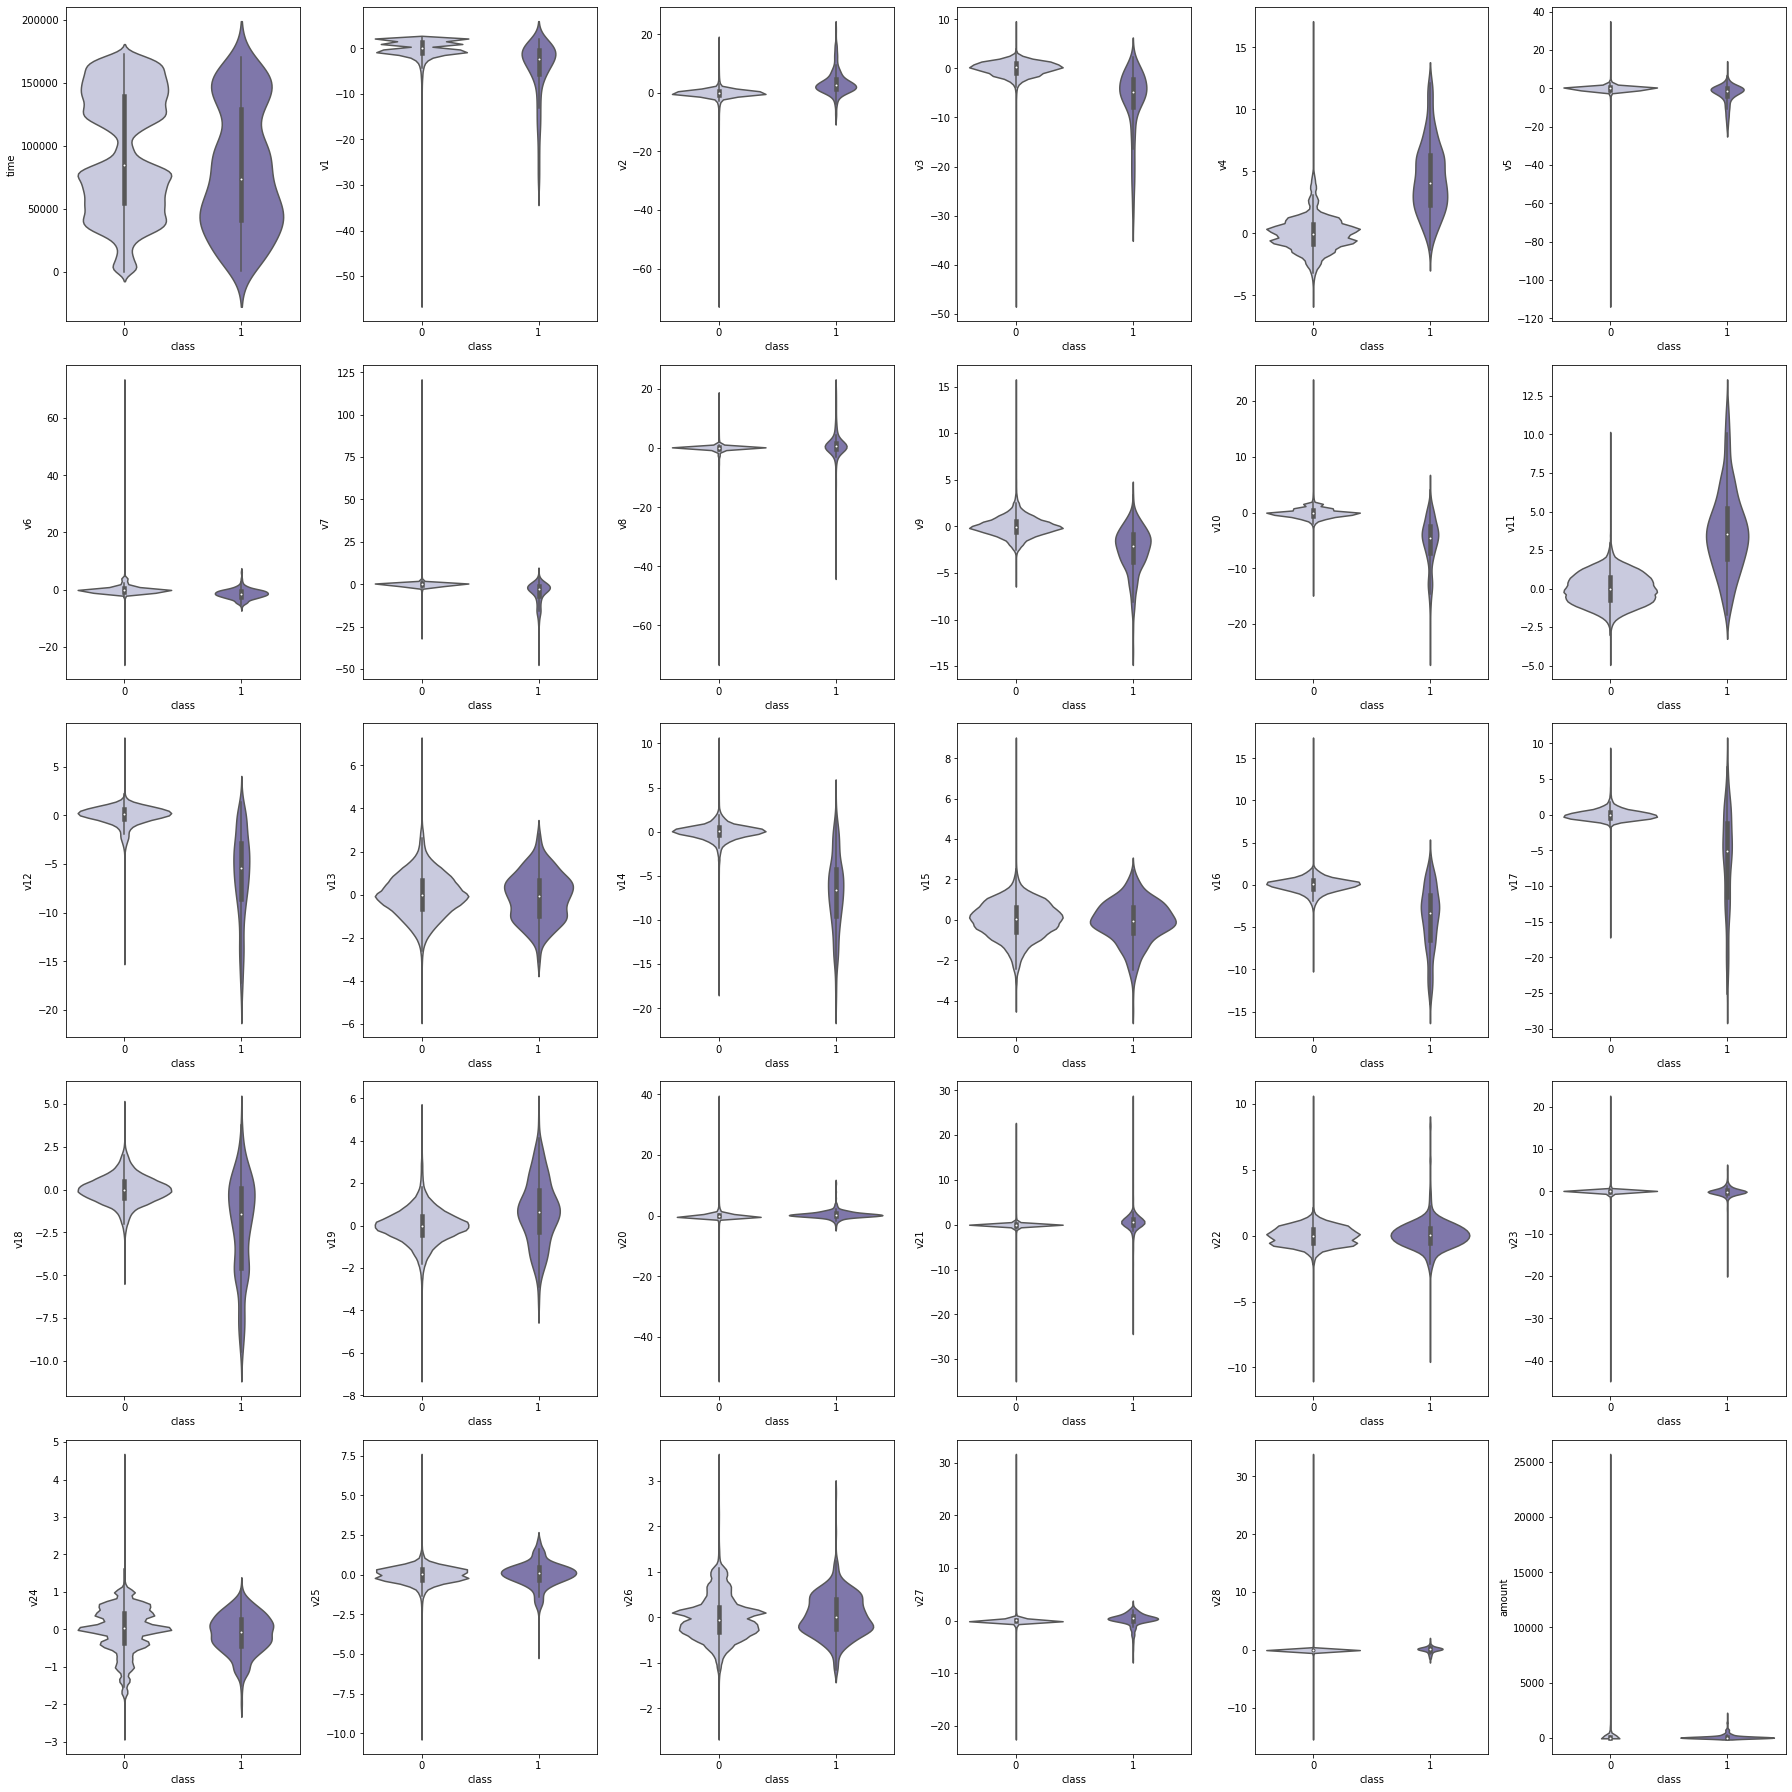

In [11]:
# is there difference between fraudulent and non fraudulent transactions' distributions?
index = 0
plt.figure(figsize=(25,25))
for feature in df:
    if feature != "class":
        index += 1
        plt.subplot(5,6, index)
        sns.violinplot(x='class',palette="Purples",y=feature, data=df)
plt.tight_layout()

In [ ]:
# when we look at v1-v28 columns : all the medians of non-fraudulent transactions are almost 0, but the medians of fraudulent transactions vary.

In [ ]:
# non-fraudulent transactions have extreme amounts but fraudulent transactions have higher mean amount.

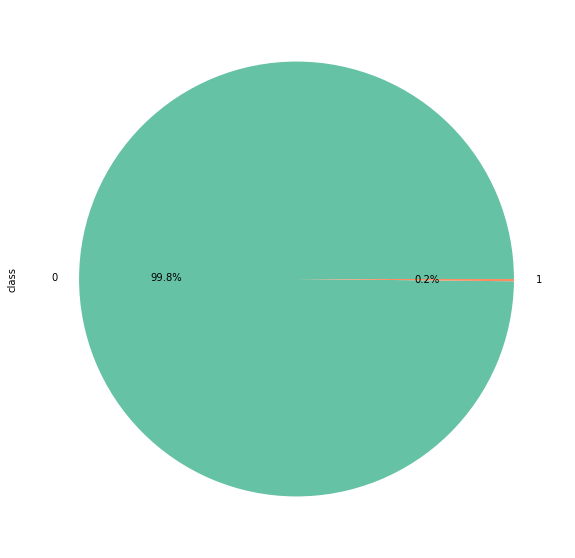

In [12]:
df["class"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

In [ ]:
# highly unbalanced target column.

''

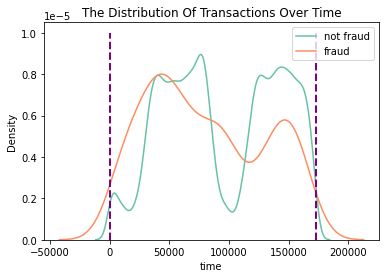

In [13]:
#the distribution of transactions over time in the fraudulent and non-fraudulent categories.

sns.distplot(df[df["class"]==0]["time"], hist=False, label="not fraud")
sns.distplot(df[df["class"]==1]["time"], hist=False, label="fraud")
plt.title("The Distribution Of Transactions Over Time")
plt.legend()

plt.vlines(x=[0, 172792], ymin=0 , ymax=0.00001, colors='purple', ls='--', lw=2)
;

''

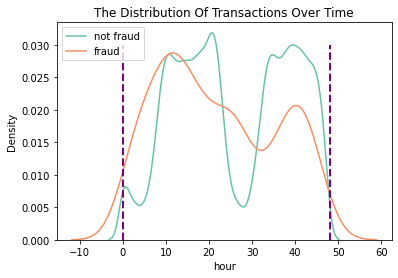

In [14]:
# for better insight, we create new column as hour.

df['hour'] = df['time'].apply(lambda x: np.floor(x / 3600))

sns.distplot(df[df["class"]==0]["hour"], hist=False,  label="not fraud")
sns.distplot(df[df["class"]==1]["hour"], hist=False, label="fraud")
plt.title("The Distribution Of Transactions Over Time")
plt.legend()
plt.vlines(x=[0, 48], ymin=0 , ymax=0.03, colors='purple', ls='--', lw=2)
;

In [ ]:
# the low density parts of non-fraudulent transactions can be at night. fraudulent transactions are not so affected by time. 

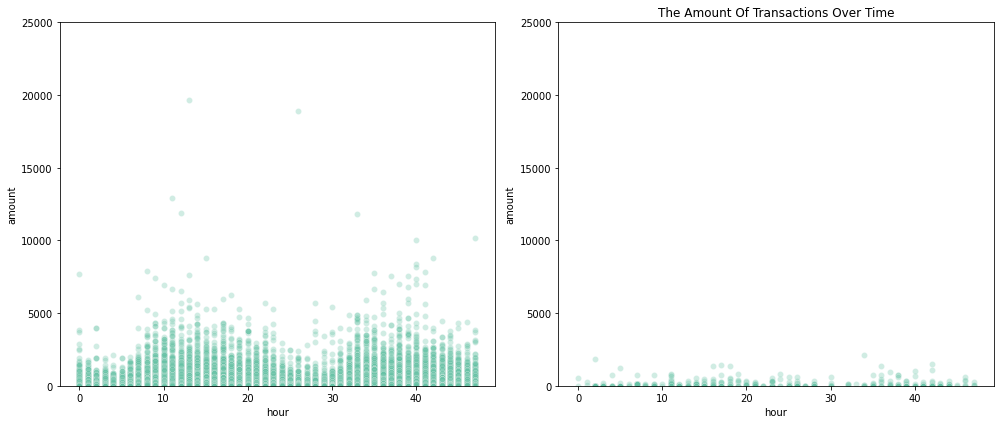

In [15]:
# the amount of transactions over time.

fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(df[df["class"]==0]["hour"], df["amount"], alpha=0.3, ax=ax[0])
sns.scatterplot(df[df["class"]==1]["hour"], df["amount"], alpha=0.3, ax=ax[1])
plt.title("The Amount Of Transactions Over Time")
ax[0].set_ylim(ymin=0, ymax=25000)
ax[1].set_ylim(ymin=0, ymax=25000)
plt.tight_layout();

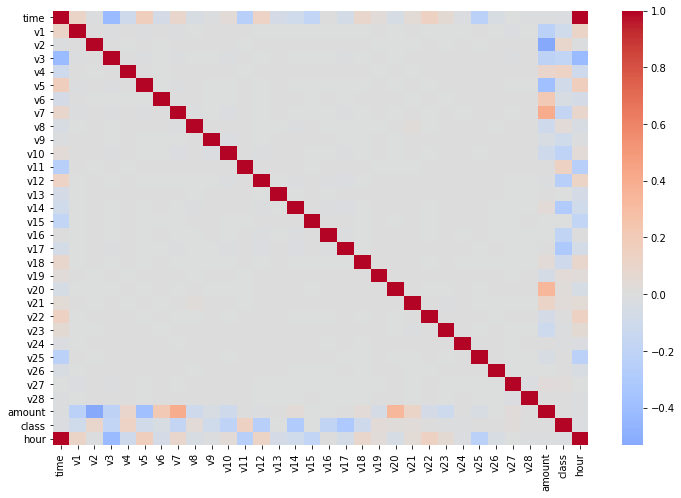

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), center=0, cmap="coolwarm");

In [ ]:
# There is ~0 correlation between v1-v8 columns. 
# normal distribution + 0 correlation = pca transformation.
# It seems that when the dataset was created, they used pca transformation to hide the real data due to security concerns.

# let's look at the scatterplots of the variables which have strog correlation between them:
# we decided to look at just them instead of using pairplot to avoid complexity and time loss.

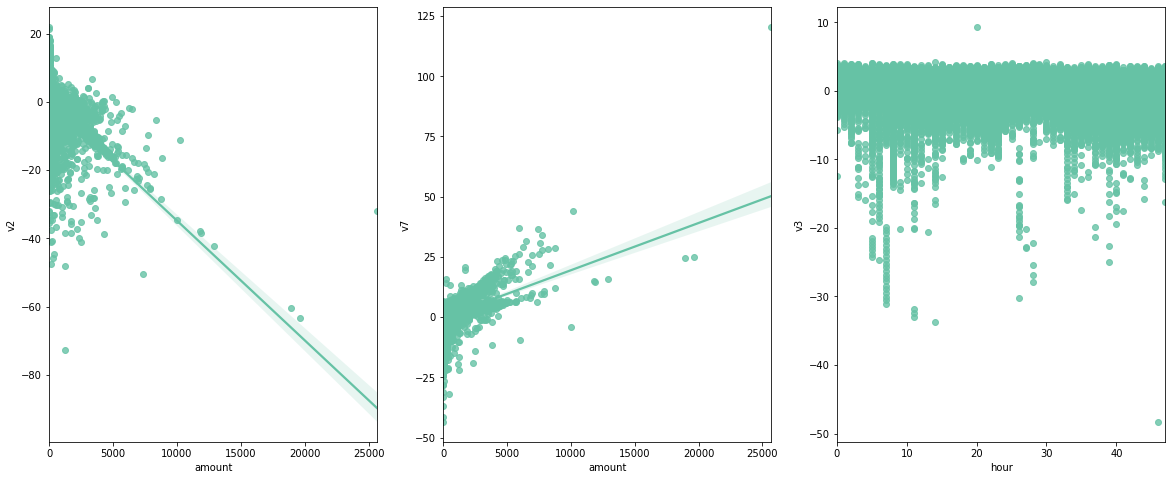

In [17]:
fig, ax= plt.subplots(1,3, figsize=(20,8))

sns.regplot(df["amount"], df["v2"], ax=ax[0])
sns.regplot(df["amount"], df["v7"], ax=ax[1])
sns.regplot(df["hour"], df["v3"], ax=ax[2]);


---
---


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [18]:
X = df.drop(columns=["class","hour"])
y = df["class"]

#### Scaling

In [19]:
# v1-v28 has already normal distribution. so we don't need to scale them. but not to bother with separating them, we can just use StandardScaler for all.
scaler = StandardScaler()

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
# we used stratify=y because of imbalanced data.

In [111]:
X_train_scaled = scaler.fit_transform(X_train) 

X_test_scaled = scaler.transform(X_test)

***ii. Model Training***

In [22]:
log_model = LogisticRegression(random_state= 42)

In [23]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

***iii. Prediction and Model Evaluating***

In [24]:
train_pred = log_model.predict(X_train_scaled)

test_pred = log_model.predict(X_test_scaled)

In [25]:
matris_scorer(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[84961    15]
 [   61    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.84      0.57      0.68       142

    accuracy                           1.00     85118
   macro avg       0.92      0.79      0.84     85118
weighted avg       1.00      1.00      1.00     85118


Train_Set
[[198248     29]
 [   120    211]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       0.88      0.64      0.74       331

    accuracy                           1.00    198608
   macro avg       0.94      0.82      0.87    198608
weighted avg       1.00      1.00      1.00    198608



In [26]:
model_scorer(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train_set,test_set
Accuracy,0.999,0.999
Precision,0.879,0.844
Recall,0.637,0.570
f1,0.739,0.681


In [ ]:
# it seems like there is not overfitting. but not good recall.


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


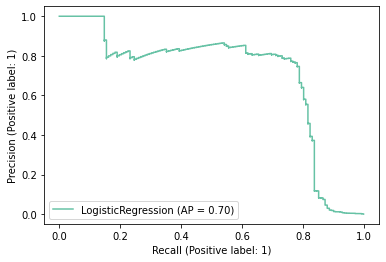

In [27]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

***v. Apply StratifiedKFold***

In [28]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [29]:
precisions, recalls, thresholds = precision_recall_curve(test_pred, y_pred_proba[:,1])

In [30]:
# probability treshold.
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5137662668969852

In [31]:
   
# It determines the index numbers according to how many parts we want to divide the model into.
# with this function, we will see the average evaluating values according to optimal_threshold.

def kfold(n, mdl, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)       # To reset index numbers after each operation.
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        mdl = mdl
        mdl.fit(X_train, y_train)
        y_pred = mdl.predict(X_test)
        y_pred_proba = mdl.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [32]:
kfold(10, log_model, pd.DataFrame(X_train_scaled), y_train, 0.5)

Accuracy      99.92%  std 0.02%
Precision-1   87.14%  std 8.63%
Recall-1      62.25%  std 6.74%
F1_score-1    72.35%  std 6.26%


In [33]:
kfold(10, log_model, pd.DataFrame(X_train_scaled), y_train, optimal_threshold)

Accuracy      99.92%  std 0.02%
Precision-1   87.14%  std 8.63%
Recall-1      62.25%  std 6.74%
F1_score-1    72.35%  std 6.26%


In [34]:
# what we need is great recall score. so we try lower threshold to get better recall score.
kfold(10, log_model, pd.DataFrame(X_train_scaled), y_train, 0.05)

Accuracy      99.91%  std 0.02%
Precision-1   72.14%  std 7.77%
Recall-1      81.28%  std 6.83%
F1_score-1    76.08%  std 5.24%


In [ ]:
# recall score is the key for fraud detection. 
# if you say fraudulent transaction to a non-fraudulent transaction, it is not good. yes. 
# but if you can not catch the fraudulent transaction, it is inexcusable. 

In [35]:
# to compare the models with each other, we assign the scores to variables.
log_default_threshold = 0.05
y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= log_default_threshold else 0)
log_default_f1 = f1_score(y_test, y_pred2) # the new test_pred according to new threshold in the kfold function is y_pred2. 
log_default_recall = recall_score(y_test, y_pred2)
log_default_auc = roc_auc_score(y_test, y_pred2)


- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [36]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [37]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter

# summarize class distribution
counter = Counter(y_train)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy={1 : 365}) # (~ -0.1) we shouldn't make big changes in our dataset to avoid unrealistic results.
under = RandomUnderSampler(sampling_strategy={0 : 178500})  # (~ +0.1)
steps = [('o', over), ('u', under)]
pipeline = imbpipeline(steps=steps)
# transform the dataset
X_smote, y_smote = over.fit_resample(X_train, y_train)

X_smote, y_smote = under.fit_resample(X_smote, y_smote)
# summarize the new class distribution
counter = Counter(y_smote)
print(counter)


Counter({0: 198277, 1: 331})
Counter({0: 178500, 1: 365})


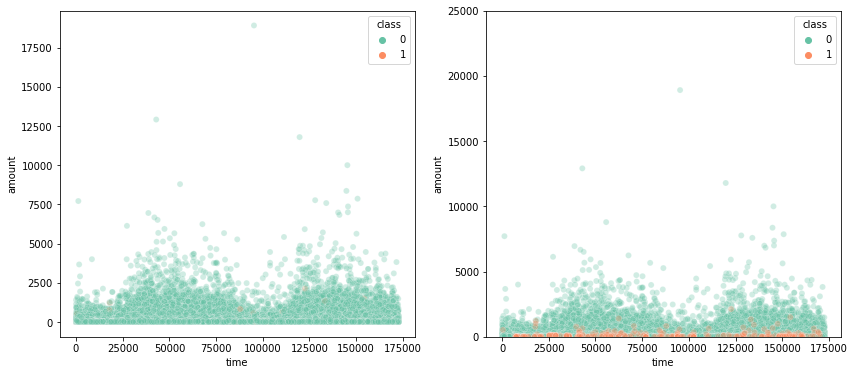

In [38]:
# scatter plot of examples by class label, before and after SMOTE.
fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(X_train["time"], X_train["amount"], alpha=0.3, hue= y_train, ax=ax[0])
sns.scatterplot(X_smote["time"], X_smote["amount"], hue= y_smote, alpha=0.3, ax=ax[1])
ax[1].set_ylim(ymin=0, ymax=25000);

In [ ]:
# we can see increased visibility of fraudulent transactions in the train dataset.

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

In [127]:
X_train_scaled = scaler.fit_transform(X_smote) 

X_test_scaled = scaler.transform(X_test)

***ii. Model Training***

In [40]:
log_smote = LogisticRegression(random_state= 42)

In [41]:
log_smote.fit(X_train_scaled, y_smote)

LogisticRegression(random_state=42)

***iii. Prediction and Model Evaluating***

In [42]:
train_pred = log_model.predict(X_train_scaled)

test_pred = log_model.predict(X_test_scaled)

In [43]:
matris_scorer(log_smote, X_train_scaled, y_smote, X_test_scaled, y_test)

Test_Set
[[84960    16]
 [   55    87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.84      0.61      0.71       142

    accuracy                           1.00     85118
   macro avg       0.92      0.81      0.85     85118
weighted avg       1.00      1.00      1.00     85118


Train_Set
[[178469     31]
 [   123    242]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    178500
           1       0.89      0.66      0.76       365

    accuracy                           1.00    178865
   macro avg       0.94      0.83      0.88    178865
weighted avg       1.00      1.00      1.00    178865



In [44]:
model_scorer(log_smote, X_train_scaled, y_smote, X_test_scaled, y_test)

,train_set,test_set
Accuracy,0.999,0.999
Precision,0.886,0.845
Recall,0.663,0.613
f1,0.759,0.710


***iv.  Plot Precision and Recall Curve***


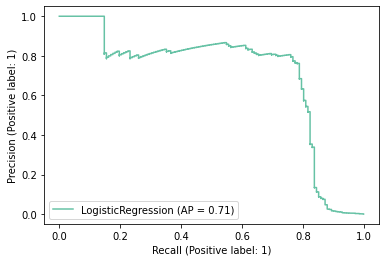

In [45]:
plot_precision_recall_curve(log_smote, X_test_scaled, y_test);

***v. Apply StratifiedKFold***

In [46]:
y_pred_proba = log_smote.predict_proba(X_test_scaled)

In [47]:
precisions, recalls, thresholds = precision_recall_curve(test_pred, y_pred_proba[:,1])

In [48]:
kfold(10, log_smote, pd.DataFrame(X_smote), y_smote, 0.5)

Accuracy      99.89%  std 0.02%
Precision-1   73.04%  std 5.09%
Recall-1      71.25%  std 8.06%
F1_score-1    71.87%  std 5.23%


In [49]:
kfold(10, log_smote, pd.DataFrame(X_smote), y_smote, 0.2)

Accuracy      99.69%  std 0.11%
Precision-1   39.20%  std 9.45%
Recall-1      73.72%  std 7.29%
F1_score-1    50.26%  std 8.19%


In [50]:
log_smote_threshold = 0.2
y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= log_smote_threshold else 0)
log_smote_f1 = f1_score(y_test, y_pred2)
log_smote_recall = recall_score(y_test, y_pred2)
log_smote_auc = roc_auc_score(y_test, y_pred2)

- Smote grid 

In [51]:
clf_grid = LogisticRegression(random_state= 42, class_weight='balanced', max_iter=1000)

In [52]:

penalty = ["l1", "l2"]
C = np.logspace(-4, 4, 10)
solver = ["saga"] 

param_grid = {"penalty" : penalty,
             "C" : C,
              "solver": solver,
              }

In [53]:
grid_model = GridSearchCV(clf_grid, param_grid = param_grid,scoring= "recall" )

In [54]:
grid_model.fit(X_train_scaled, y_smote)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['saga']},
             scoring='recall')

In [55]:
grid_model.best_params_

{'C': 0.046415888336127774, 'penalty': 'l1', 'solver': 'saga'}

In [56]:
log_grid_scorer= model_scorer(grid_model, X_train_scaled, y_smote, X_test_scaled, y_test)
log_grid_scorer

,train_set,test_set
Accuracy,0.975,0.975
Precision,0.072,0.056
Recall,0.932,0.887
f1,0.134,0.105


In [112]:
y_pred = grid_model.predict(X_test_scaled)

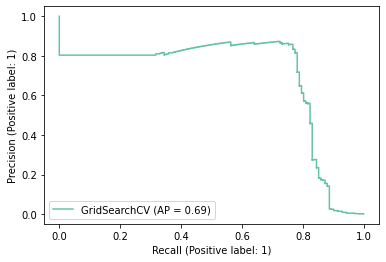

In [57]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

In [113]:
log_grid_f1 = f1_score(y_test, y_pred)
log_grid_recall = recall_score(y_test, y_pred)
log_grid_auc = roc_auc_score(y_test, y_pred)

In [114]:
log_grid_recall

0.8873239436619719

### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

In [59]:
rf_model = RandomForestClassifier(max_depth=8, random_state=42)
rf_model.fit( X_smote, y_smote)

RandomForestClassifier(max_depth=8, random_state=42)

In [60]:
matris_scorer(rf_model, X_smote, y_smote, X_test, y_test)

Test_Set
[[84971     5]
 [   34   108]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.76      0.85       142

    accuracy                           1.00     85118
   macro avg       0.98      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118


Train_Set
[[178499      1]
 [    56    309]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    178500
           1       1.00      0.85      0.92       365

    accuracy                           1.00    178865
   macro avg       1.00      0.92      0.96    178865
weighted avg       1.00      1.00      1.00    178865



In [61]:
model_scorer(rf_model,X_smote, y_smote, X_test, y_test)

,train_set,test_set
Accuracy,1.000,1.000
Precision,0.997,0.956
Recall,0.847,0.761
f1,0.916,0.847


In [62]:
y_pred = rf_model.predict(X_test)
rf_model_f1 = f1_score(y_test, y_pred)
rf_model_recall = recall_score(y_test, y_pred)
rf_model_auc = roc_auc_score(y_test, y_pred)

In [63]:
param_grid = {'n_estimators':[50, 100, 300],
             'max_depth':[3, 5, 7, 9]}

In [64]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "recall", n_jobs = -1, verbose = 2).fit(X_smote, y_smote)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [65]:
rf_grid_model.best_params_

{'max_depth': 3, 'n_estimators': 50}

***ii. Prediction and Model Evaluating***

In [66]:
matris_scorer(rf_grid_model, X_smote, y_smote, X_test, y_test)

Test_Set
[[84393   583]
 [   24   118]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     84976
           1       0.17      0.83      0.28       142

    accuracy                           0.99     85118
   macro avg       0.58      0.91      0.64     85118
weighted avg       1.00      0.99      1.00     85118


Train_Set
[[177341   1159]
 [    44    321]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    178500
           1       0.22      0.88      0.35       365

    accuracy                           0.99    178865
   macro avg       0.61      0.94      0.67    178865
weighted avg       1.00      0.99      1.00    178865



In [67]:
model_scorer(rf_grid_model, X_smote, y_smote, X_test, y_test)

,train_set,test_set
Accuracy,0.993,0.993
Precision,0.217,0.168
Recall,0.879,0.831
f1,0.348,0.280


***iii. Plot Precision and Recall Curve***


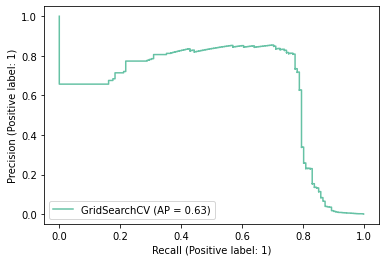

In [68]:
plot_precision_recall_curve(rf_grid_model, X_test, y_test);

In [69]:
y_pred = rf_grid_model.predict(X_test)
rf_grid_model_f1 = f1_score(y_test, y_pred)
rf_grid_model_recall = recall_score(y_test, y_pred)
rf_grid_model_auc = roc_auc_score(y_test, y_pred)

***iv. Apply StratifiedKFold***

In [71]:
rf_kfold = RandomForestClassifier(max_depth= 3, n_estimators= 50, random_state= 42)


rf_kfold.fit(X_smote, y_smote)

matris_scorer(rf_kfold, X_smote, y_smote, X_test, y_test)

Test_Set
[[84962    14]
 [   58    84]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.86      0.59      0.70       142

    accuracy                           1.00     85118
   macro avg       0.93      0.80      0.85     85118
weighted avg       1.00      1.00      1.00     85118


Train_Set
[[178471     29]
 [   115    250]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    178500
           1       0.90      0.68      0.78       365

    accuracy                           1.00    178865
   macro avg       0.95      0.84      0.89    178865
weighted avg       1.00      1.00      1.00    178865



In [72]:
from sklearn.metrics import average_precision_score

In [73]:
y_pred_proba = rf_kfold.predict_proba(X_test)
average_precision_score(y_test, y_pred_proba[:,1])

0.7523449107533998

In [74]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])

In [75]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.2360023525929361

In [76]:
kfold(10, rf_kfold, pd.DataFrame(X_train), y_train, optimal_threshold)

Accuracy      99.93%  std 0.02%
Precision-1   82.89%  std 7.14%
Recall-1      75.22%  std 4.47%
F1_score-1    78.73%  std 4.74%


In [77]:
feats = pd.DataFrame(index=X_smote.columns, data= rf_grid_model.best_estimator_.feature_importances_, columns=["Feature Importance"])
RF_feature_imp = feats.sort_values("Feature Importance", ascending=False)

RF_feature_imp 

,Feature Importance
v14,0.319
v10,0.132
v3,0.101
v17,0.097
v4,0.088
v12,0.080
v16,0.063
v2,0.030
v9,0.022
v27,0.017


In [ ]:
# we can use first 7 features.

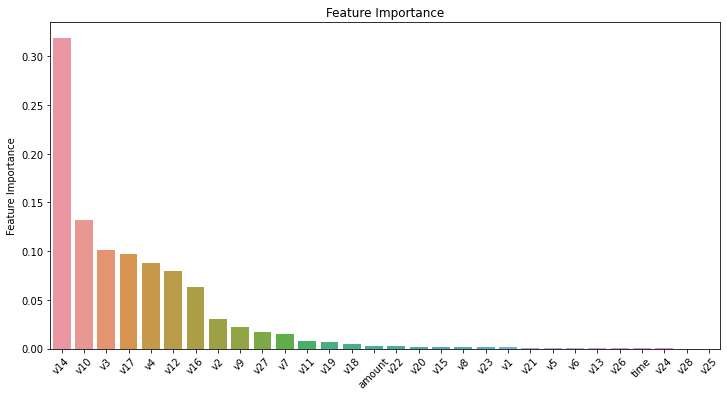

In [78]:
plt.figure(figsize=(12,6))
sns.barplot(y=RF_feature_imp["Feature Importance"], x=RF_feature_imp.index)

plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [80]:
X_train= X_smote[['v14','v10', 'v3', "v4", 'v17', 'v12','v16']]

In [81]:
X_test= X_test[['v14','v10', 'v3', "v4", 'v17', 'v12','v16']]

In [82]:
rf_grid_model1 = RandomForestClassifier(max_depth= 3, n_estimators= 50, random_state= 42)
rf_grid_model1.fit( X_train, y_smote)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)

In [83]:
matris_scorer(rf_grid_model1, X_train, y_smote, X_test, y_test)

Test_Set
[[84962    14]
 [   47    95]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.87      0.67      0.76       142

    accuracy                           1.00     85118
   macro avg       0.94      0.83      0.88     85118
weighted avg       1.00      1.00      1.00     85118


Train_Set
[[178468     32]
 [    99    266]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    178500
           1       0.89      0.73      0.80       365

    accuracy                           1.00    178865
   macro avg       0.95      0.86      0.90    178865
weighted avg       1.00      1.00      1.00    178865



In [84]:
model_scorer(rf_grid_model1, X_train, y_smote, X_test, y_test)

,train_set,test_set
Accuracy,0.999,0.999
Precision,0.893,0.872
Recall,0.729,0.669
f1,0.802,0.757


In [85]:
y_pred = rf_grid_model1.predict(X_test)
rf_grid_model1_f1 = f1_score(y_test, y_pred)
rf_grid_model1_recall = recall_score(y_test, y_pred)
rf_grid_model1_auc = roc_auc_score(y_test, y_pred)

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.utils import class_weight

***ii. Define Model***

In [88]:
X = df.drop(["class","hour"],axis=1)
y = df['class'].values

In [89]:
seed = 42

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.20, random_state=seed)

In [91]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

***iii. Compile Model***

In [92]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(64, input_dim = X_train.shape[1]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(16))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))

In [93]:
opt = Adam(lr = 0.005)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

***iv. Fit Model***

In [94]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=5, restore_best_weights = True)

In [95]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 200, callbacks=[early_stop], verbose=1)

Epoch 1/200
6384/6384 [==============================] - 34s 5ms/step - loss: 0.0072 - recall: 0.6676 - val_loss: 0.0036 - val_recall: 0.8286
Epoch 2/200
6384/6384 [==============================] - 30s 5ms/step - loss: 0.0034 - recall: 0.7580 - val_loss: 0.0036 - val_recall: 0.8286
Epoch 3/200
6384/6384 [==============================] - 28s 4ms/step - loss: 0.0033 - recall: 0.7522 - val_loss: 0.0034 - val_recall: 0.8286
Epoch 4/200
6384/6384 [==============================] - 29s 5ms/step - loss: 0.0032 - recall: 0.7580 - val_loss: 0.0033 - val_recall: 0.8286
Epoch 5/200
6384/6384 [==============================] - 29s 4ms/step - loss: 0.0031 - recall: 0.7668 - val_loss: 0.0039 - val_recall: 0.8286
Epoch 6/200
6384/6384 [==============================] - 28s 4ms/step - loss: 0.0028 - recall: 0.7755 - val_loss: 0.0034 - val_recall: 0.8000
Epoch 7/200
6384/6384 [==============================] - 30s 5ms/step - loss: 0.0029 - recall: 0.7755 - val_loss: 0.0028 - val_recall: 0.8000
Epoch 

In [96]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32)                0

In [97]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.007,0.668,0.004,0.829
1,0.003,0.758,0.004,0.829
2,0.003,0.752,0.003,0.829
3,0.003,0.758,0.003,0.829
4,0.003,0.767,0.004,0.829


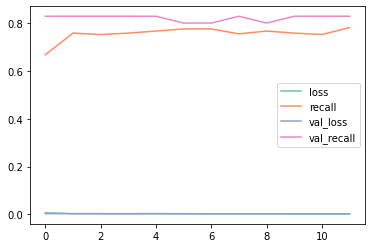

In [98]:
loss_df.plot();

***v. Prediction and Model Evaluating***

<AxesSubplot:>

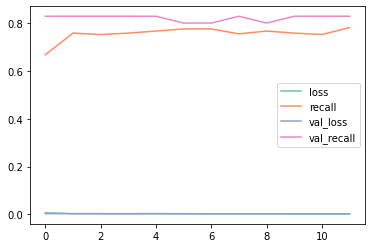

In [99]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()

<AxesSubplot:>

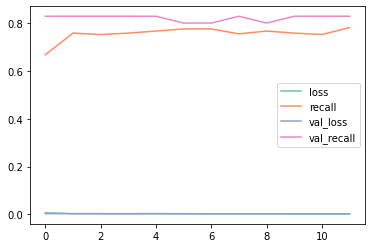

In [100]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()

In [101]:
model.evaluate(X_test, y_test, verbose=0) 

[0.004014692269265652, 0.7368420958518982]

In [102]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", recall)

loss :  0.004014692269265652
Recall :  0.7368420958518982


In [103]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1774/1774 [==============================] - 4s 2ms/step
[[56643     8]
 [   25    70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.90      0.74      0.81        95

    accuracy                           1.00     56746
   macro avg       0.95      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746



***vi. Plot Precision and Recall Curve***

1774/1774 [==============================] - 4s 2ms/step


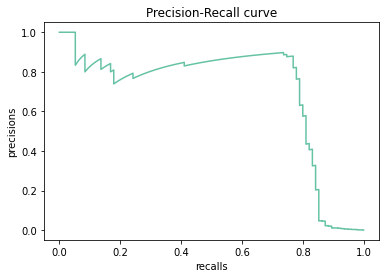

In [104]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [105]:
model_f1 = f1_score(y_test, y_pred)
model_recall = recall_score(y_test, y_pred)
model_auc = roc_auc_score(y_test, y_pred)

Comparing:) 


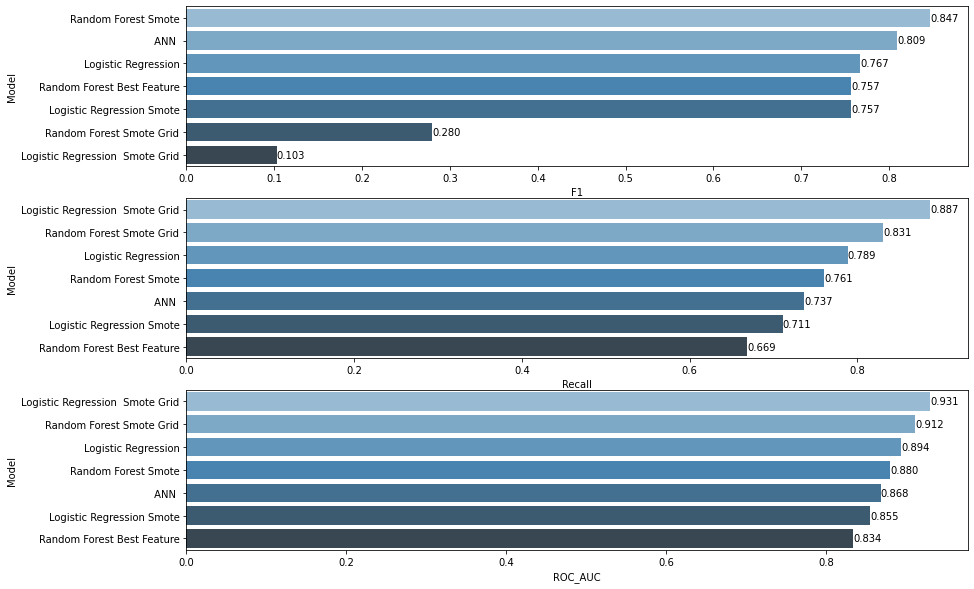

In [115]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "Logistic Regression Smote",
                                 "Logistic Regression  Smote Grid", "Random Forest Smote", "Random Forest Smote Grid","Random Forest Best Feature", " ANN "],
                         
                        "F1": [log_default_f1, log_smote_f1, log_grid_f1, rf_model_f1,  rf_grid_model_f1, rf_grid_model1_f1, model_f1],
                        "Recall": [log_default_recall, log_smote_recall, log_grid_recall, rf_model_recall, rf_grid_model_recall, rf_grid_model1_recall, model_recall],
                        "ROC_AUC": [log_default_auc, log_smote_auc, log_grid_auc, rf_model_auc, rf_grid_model_auc, rf_grid_model1_auc, model_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        
        ax.text(width,                              
                p.get_y() + p.get_height() / 2,      
                '{:1.3f}'.format(width),            
                ha = 'left',                        
                va = 'center')                       
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

In [ ]:
# we are comparing recall values. logistic regrression smote grid seems to be the best model according to recall values.

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Model as .pkl


In [119]:
final_model = LogisticRegression(random_state= 42,C = 0.046415888336127774, penalty = 'l1', solver = 'saga', class_weight='balanced', max_iter=1000)

In [129]:
final_model.fit(X_train_scaled, y_smote)

LogisticRegression(C=0.046415888336127774, class_weight='balanced',
                   max_iter=1000, penalty='l1', random_state=42, solver='saga')

In [135]:
pd.DataFrame(final_model.coef_, 
             columns=X.columns).T

,0
time,-0.261
v1,1.134
v2,0.050
v3,0.122
v4,1.344
v5,0.617
v6,-0.496
v7,-0.147
v8,-0.604
v9,-0.514


In [138]:
X_train_scaled = scaler.fit_transform(X_smote[["v1", "v4", "v10", "v12", "v14"]]) 
X_test_scaled = scaler.transform(X_test[["v1", "v4", "v10", "v12", "v14"]])

In [139]:
final_model.fit(X_train_scaled, y_smote)

LogisticRegression(C=0.046415888336127774, class_weight='balanced',
                   max_iter=1000, penalty='l1', random_state=42, solver='saga')

In [140]:
model_scorer(final_model, X_train_scaled, y_smote, X_test_scaled, y_test)

,train_set,test_set
Accuracy,0.975,0.975
Precision,0.070,0.057
Recall,0.904,0.887
f1,0.130,0.106


In [ ]:
# still the best recall. 

In [141]:
import joblib
joblib.dump(final_model, open('final_model.pkl', 'wb'))

### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___